# IBM Project Name: Real-Time Communication System Powered by AI for Specially Abled
# TEAM ID: PNT2022TMID37805

# --------------------------------------------------------------------------------------------------

# IMPORTING NECESSARY LIBRARIES

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

# RENAMING DATA FILES

In [26]:
def rename_imgs(file_name):
    folder_path = r'test_dataset/'+file_name

    num = 0
    for file in os.listdir(folder_path):
        # if num%10 == 0:
        #     print(f'Renamed {num} files...')
        # os.rename(folder_path+'\\'+file, folder_path+'\\'+file_name+'_'+str(num)+'.jpeg')
        num += 1

In [25]:
fn = 'Space'
rename_imgs(fn)

In [7]:
file_names = '0123456789'+'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
for fn in file_names:
    rename_imgs(fn)

# DISPLAYING SAMPLE IMAGES FROM DATASET

In [8]:
train_data_path = 'train_dataset/'
test_data_path = 'test_dataset/'

In [9]:
def display(img,sign=None):
    
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    fig = plt.figure(figsize=(7,7))
    ax = fig.add_subplot(111)
    plt.title(sign)
    ax.imshow(img)

## Training Data Images

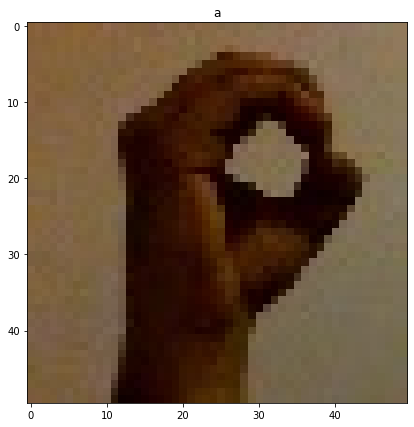

In [10]:
sign_img = cv2.imread(train_data_path+'O/O_234.jpeg')
display(sign_img,'a')

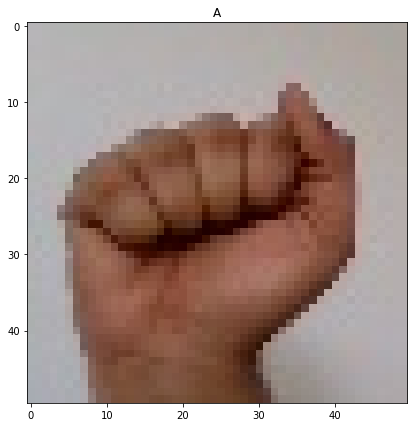

In [11]:
sign_img = cv2.imread(train_data_path+'A/A_204.jpeg')
display(sign_img,'A')

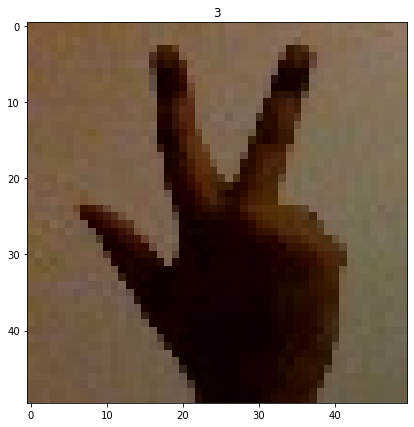

In [12]:
sign_img = cv2.imread(train_data_path+'3/3_340.jpeg')
display(sign_img,'3')

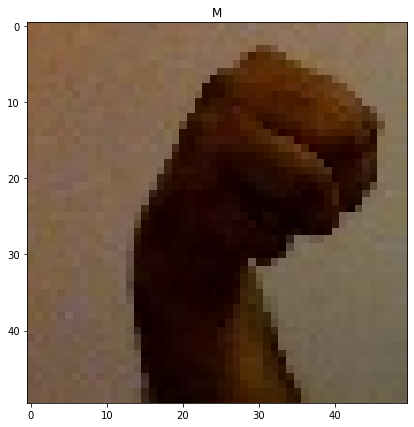

In [13]:
sign_img = cv2.imread(train_data_path+'M/M_100.jpeg')
display(sign_img,'M')

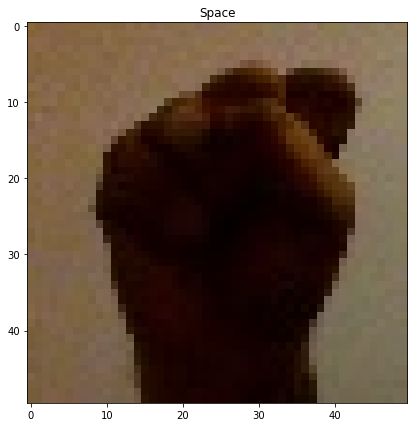

In [14]:
sign_img = cv2.imread(train_data_path+'S/S_10.jpeg')
display(sign_img,'Space')

## Test Data Images

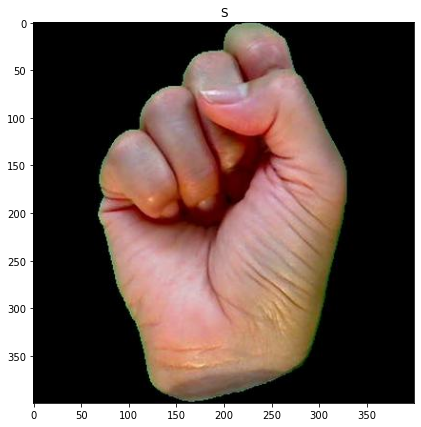

In [15]:
sign_img = cv2.imread(test_data_path+'S/S_15.jpeg')
display(sign_img,'S')

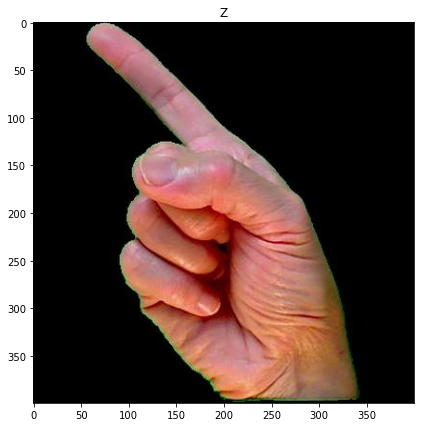

In [16]:
sign_img = cv2.imread(test_data_path+'Z/Z_1.jpeg')
display(sign_img,'Z')

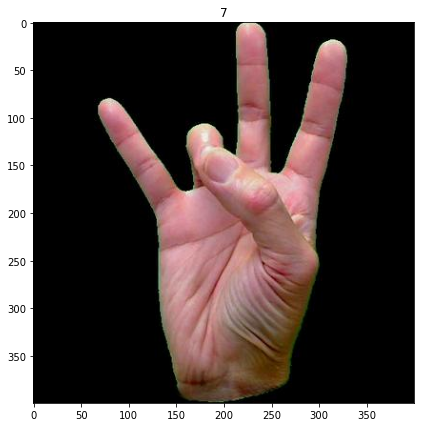

In [17]:
sign_img = cv2.imread(test_data_path+'7/7_8.jpeg')
display(sign_img,'7')

# AUGMENTATION AND PREPROCESSING THE DATASET

## Creating ImageDataGenerator

In [18]:
image_gen = ImageDataGenerator(rotation_range=30,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.2,
                              zoom_range=0.2,
                              rescale=1/255,
                              horizontal_flip=True,
                              fill_mode='nearest',
                              validation_split=0.25)

## Original Image

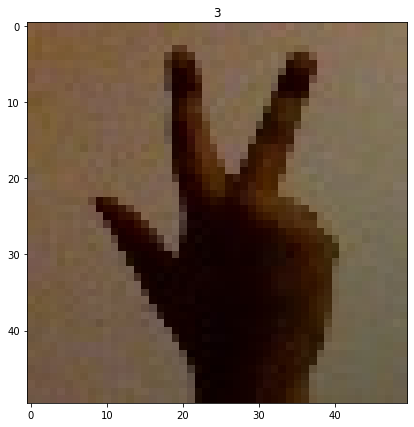

In [19]:
sign_img = cv2.imread(train_data_path+'3/3_100.jpeg')
display(sign_img,'3')

## Augmented Images

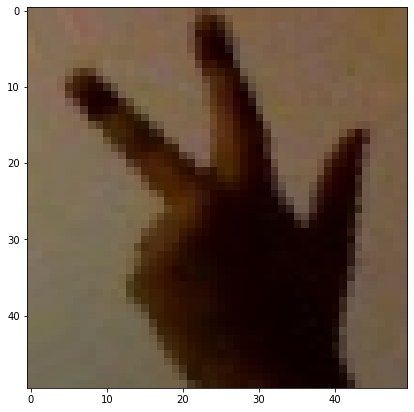

In [20]:
display(image_gen.random_transform(sign_img))

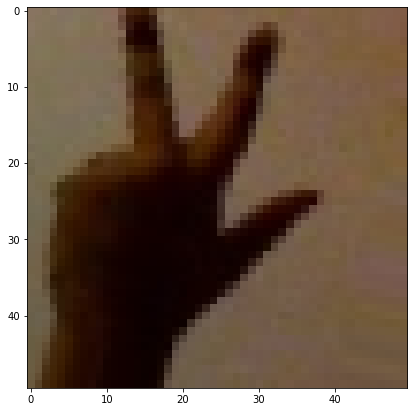

In [21]:
display(image_gen.random_transform(sign_img))

# SPLITING INTO TRAIN AND VALIDATION DATASET

## Train Data Generator

In [22]:
train_data_gen = image_gen.flow_from_directory(train_data_path,
                                           target_size=(250,250),
                                           batch_size=16,
                                           shuffle=True,
                                           class_mode='binary',
                                           subset='training')

Found 41625 images belonging to 37 classes.


## Validation Data Generator

In [23]:
validation_data_gen = image_gen.flow_from_directory(train_data_path,
                                           target_size=(250,250),
                                           batch_size=16,
                                           shuffle=True,
                                           class_mode='binary',
                                           subset='validation')

Found 13875 images belonging to 37 classes.


## Test Data Generator

In [30]:
test_data_gen = image_gen.flow_from_directory(test_data_path,
                                           target_size=(250,250),
                                           batch_size=8,
                                           shuffle=True,
                                           class_mode='categorical',
                                           )

Found 2586 images belonging to 37 classes.


In [31]:
train_data_gen.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 'A': 10,
 'B': 11,
 'C': 12,
 'D': 13,
 'E': 14,
 'F': 15,
 'G': 16,
 'H': 17,
 'I': 18,
 'J': 19,
 'K': 20,
 'L': 21,
 'M': 22,
 'N': 23,
 'O': 24,
 'P': 25,
 'Q': 26,
 'R': 27,
 'S': 28,
 'Space': 29,
 'T': 30,
 'U': 31,
 'V': 32,
 'W': 33,
 'X': 34,
 'Y': 35,
 'Z': 36}

In [34]:
test_data_gen.classes

array([ 0,  0,  0, ..., 36, 36, 36])

In [35]:
len(train_data_gen.classes)

41625

In [36]:
len(test_data_gen.classes)

2586